# Normalize for continuous (=spatial) features

Get min-max values for distances and moments:
- over all positions*/subpockets** (coarse grained)
- per position*/subpocket** (fine grained)

\* positions in context of distances
\** subpockets in context of moments

In [1]:
from pathlib import Path

from kissim.utils import spatial_min_max_from_fingerprint_generator
from kissim.encoding import FingerprintGenerator, FingerprintGeneratorNormalized

from src.paths import PATH_RESULTS

In [2]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = PATH_RESULTS / "all"

## Load fingerprints

In [3]:
fingerprint_generator = FingerprintGenerator.from_json(RESULTS / "fingerprints_clean.json")
print(f"Number of fingerprints: {len(fingerprint_generator.data)}")

Number of fingerprints: 4681


## Get min-max for fingerprints

In [4]:
min_max_options = [
    ["distances", True],
    ["distances", False],
    ["moments", True],
    ["moments", False],
]

for min_max_option in min_max_options:
    spatial = min_max_option[0]
    fine_grained = min_max_option[1]
    file_name = f"min_max_{spatial}_{'fine' if fine_grained else 'coarse'}.csv"
    df = spatial_min_max_from_fingerprint_generator(
        fingerprint_generator, feature=spatial, fine_grained=fine_grained
    )
    # df.to_csv(HERE / f"../../../kissim/kissim/data/{file_name}")

## Normalize fingerprints

In [5]:
%%time
fingerprint_generator_normalized = FingerprintGeneratorNormalized.from_fingerprint_generator(
    fingerprint_generator
)

CPU times: user 20.6 s, sys: 104 ms, total: 20.7 s
Wall time: 20.8 s


### Distances

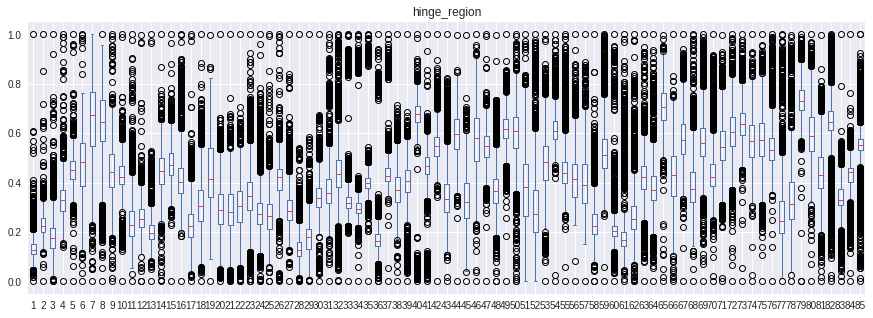

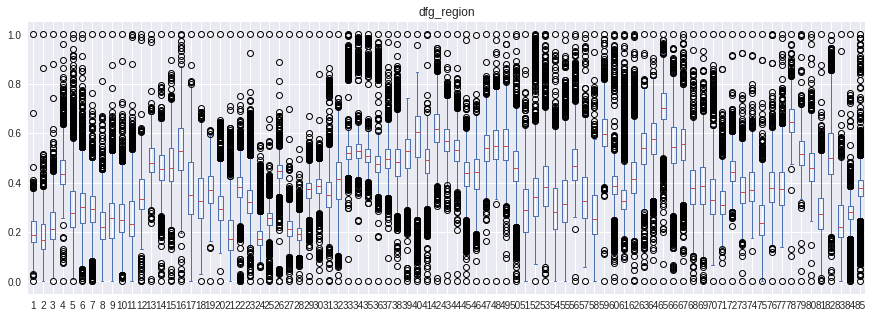

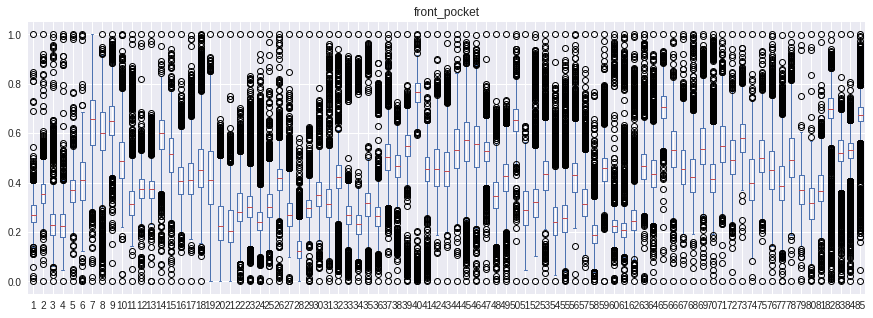

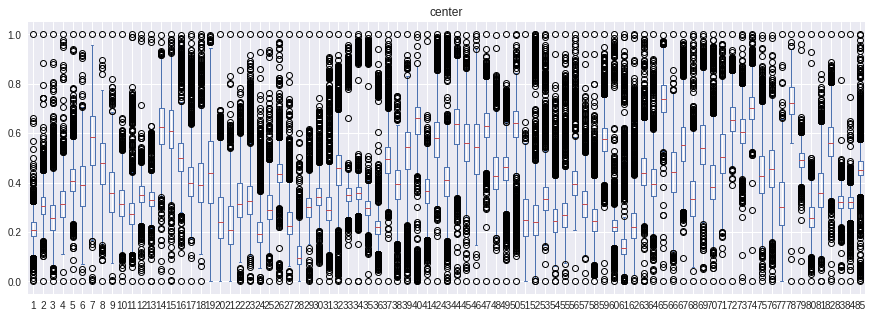

In [6]:
features_d = fingerprint_generator_normalized.distances_exploded
for subpocket, df in features_d.items():
    df.unstack(1).plot(kind="box", figsize=(15, 5), title=subpocket)

### Moments

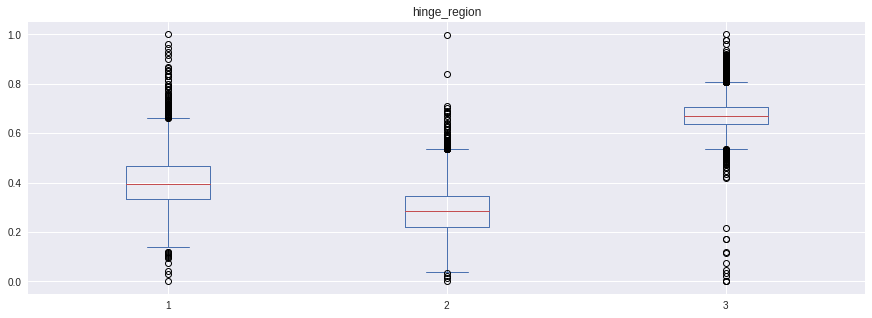

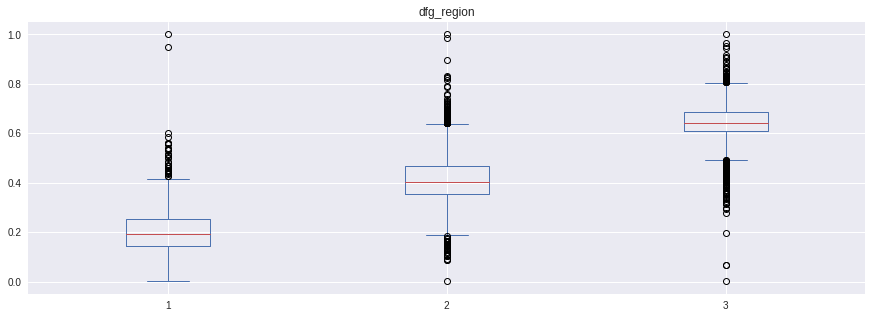

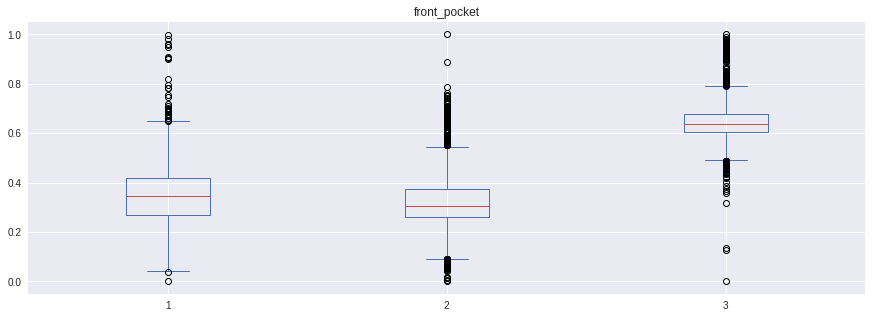

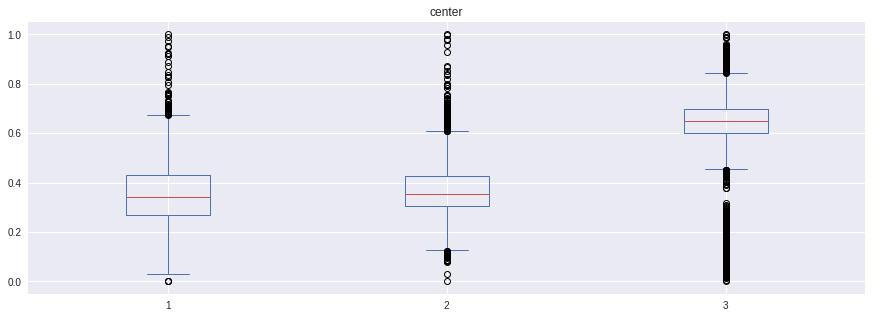

In [7]:
features_m = fingerprint_generator_normalized.moments_exploded
for subpocket, df in features_m.items():
    df.unstack(1).plot(kind="box", figsize=(15, 5), title=subpocket)